<a href="https://colab.research.google.com/github/egustavo20/dataset_datascience/blob/master/Analisando_os_Dados_do_Airbnb_(Irlanda_Dublin)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Irlanda Dublin*

Quando falamos em um plano de viagem internacional, um lugar bem cotado por brasileiros seja para finalidades de estudo, trabalho, migração ou apenas turismo será **Irlanda (Dublin)**. Pois quando colocamos na ponta do lápis alguns custos, esse destino possivelmente será atrativo e irá fazer parte de sua lista. E um dos principais fatores para tirar o seu plano do papel, será a hospedagem? E mediante a essa questão, temos a opção fantástica de conhecer e utilizar os serviços **airbnb** que possui uma gama de imóveis para estadia, com diferentes preços e localizações que podem atender a sua real necessidade.


<img alt="Colaboratory logo" width="1.5%" src="https://image.flaticon.com/icons/png/512/174/174857.png"> by [egustavo](https://www.linkedin.com/in/elcio-gustavo-soares-de-araujo-74a22068/)

 <img alt="Colaboratory logo" width="8.5%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png"> by [Data Science na Prática 2.0](https://sigmoidal.ai)

---
<img alt="Capa" width="150.0%" src="https://i.ytimg.com/vi/DyjX0CXU65Q/maxresdefault.jpg">

 


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="19%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção de dados

In [248]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [249]:
#Importando o arquivo  para montagem do Dataframe
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2020-12-17/visualisations/listings.csv')

In [250]:
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

##Análise dos dados

**Dicionário da variáveis**

* `id` - - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna. Este dataset que baixamos é a versão "resumida" do Airbnb o arquivo `listings.csv`.

In [251]:
# verificar as 5 primeiras entradas do dataset
df.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,1.91,3,0
1,68483,Unique Central Dublin River-view,339817,John,NaN,Dublin City,53.34501,-6.26552,Entire home/apt,92,3,103,2019-08-12,0.87,1,43
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.05,1,348
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,51,3,182,2020-03-09,1.56,3,114
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.95,3,0


In [252]:
# identificar o volume de dados do DataFrame
print("Variáveis: \t {}".format(df.shape[0]))
print("Entradas: \t {}\n".format(df.shape[1]))

display(df.dtypes)

Variáveis: 	 7894
Entradas: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [253]:
# Em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.193311
last_review                       0.193311
name                              0.000127
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Como podemos observar a coluna com maior representatividade de valores ausentes `neighbourhood_group` com 100% dos valores com falta de informação. Desta forma poderemos eliminar essa coluna pois a mesma não traz valor a analise.
Quanto as colunas `reviews_per_month` e `last_review` podemos observar uma discreta distorção de 19% de dados ausentes. Porém poderemos mitigar esse ruido, entendendo um pouco mais a frente a distribuição dos dados, pois como possuimos um percentual de valores ausentes discreto, será possível utiliza-lo para analise.



### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

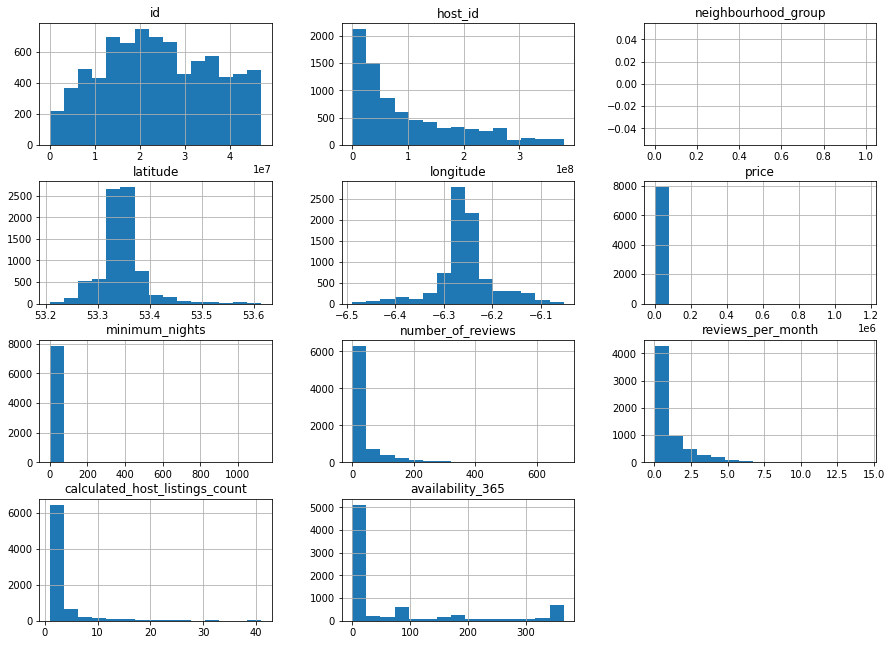

In [254]:
df.hist(bins=15,figsize=(15,11));

Com uma breve analise da distribuição das variáveis, plotadas em histogramas. Podemos observar de forma *macro* que algumas informações devem ser acompanhadas de perto:

* `price`- O acumulo de frequência próximo do $L_{i}$ em zero

* `minimum_nights` - Valor alto para distribuição de variáveis (Amplitude) possível indício de outliers.




### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [255]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.894000e+03,7894.000000,7894.000000,6368.000000,7894.000000,7894.000000
mean,2.749541e+02,4.953636,32.282366,1.034852,2.946035,70.087281
std,1.321374e+04,22.738843,60.848500,1.387199,4.897648,117.881707
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.000000e+01,1.000000,1.000000,0.130000,1.000000,0.000000
50%,8.000000e+01,2.000000,6.000000,0.460000,1.000000,0.000000
75%,1.320000e+02,3.000000,33.000000,1.380000,2.000000,89.000000
max,1.173721e+06,1125.000000,688.000000,14.460000,41.000000,365.000000


O resumo estatístico acima, podemos validar algumas hipóteses como:

  * O exemplo claro da presença de **_*Outliers*_** na coluna `price` a variação esta muito alta comparado com o valor dos dados concentrados em 75% dos valores da variável, porém estamos tomando como evidência primaria o valor descrepante de máximo em 1173721.

  * A quantidade minima de noites (`minimum_nights`) está acima de 365 dias
  no ano, contrariando a variável (`availability_365`)

 Com esses básicos inputs que acabamos de levantar, podemos obter mais informações para amadurecer as nossas analises. Pois trabalhando esses outliers, podemos corrigir a rota da nossa média que não está refletindo a realidade, pois a concentração desses valores fora de serie, ou as vezes unicos podem chegar uma variação incerta.

Para explorarmos a fundo esses *OUTLIERS* iremos utilizar o **_*Boxplot*_**

#### Boxplot para minimum_nights


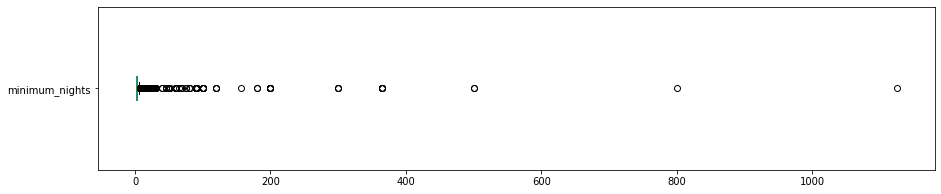

minimum_nights: valores acima de 30
80 entradas
1.0134%


In [256]:
# minimum_nights
df.boxplot('minimum_nights',grid=False,vert=False,figsize=(15,3))
plt.show()

# quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format(len(df[df.minimum_nights>30])/df.shape[0]*100))

#### Boxplot para price

Para a coluna `price`será necessário um filtro primário, para que possamos compreender de forma mais clara a varição dos outliers. Pois se cosiderarmos o intervalo de valor máximo, iremos ocultar as demais variavéis devido a amplitude do valor máximo em relação aos demais valores. E por se tratar de um único valor fora da serie (Outlier) logo de cara podemos descondierar esse valor.

In [257]:
#Intervalo máximo da coluna `price` considerado outlier 
df['price'][df['price']>110000].value_counts().sum()

1

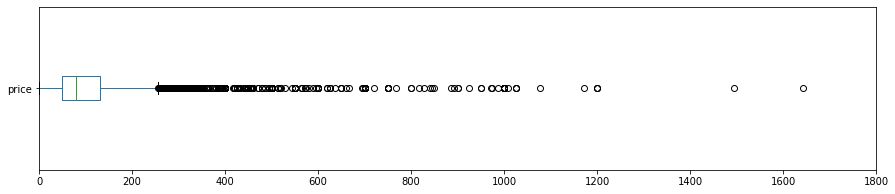


price: valores acima de 1100
21 entradas
0.2660%


In [258]:
#price
df['price'].plot(kind='box', xlim=(0,1800), vert=False, grid=False,figsize=(15,3))
plt.show()


# quantidade de valores acima de 1100 para price
print("\nprice: valores acima de 1100")
print("{} entradas".format(len(df[df.price>1100])))
print("{:.4f}%".format(len(df[df.price>1100])/df.shape[0]*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

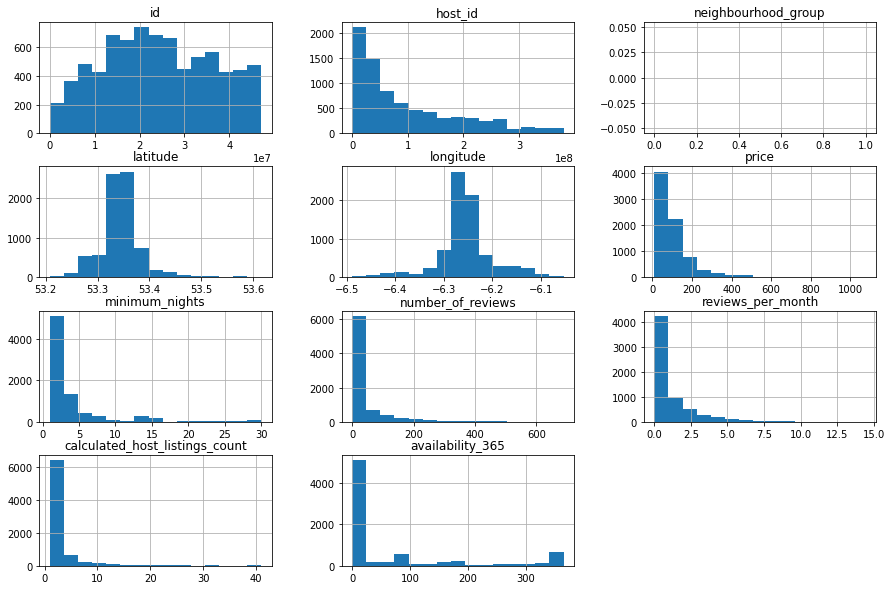

In [259]:
# remover os *outliers* em um novo DataFrame
df_limp = df.copy()
df_limp.drop(df_limp[df_limp.minimum_nights<1].index, axis=0, inplace= True)
df_limp.drop(df_limp[df_limp.minimum_nights>30].index, axis=0, inplace= True)
df_limp.drop(df_limp[df_limp.price<10].index, axis=0, inplace= True)
df_limp.drop(df_limp[df_limp.price>1100].index, axis=0, inplace= True)

# plotando histograma para as variáveis após limpeza dos outliers
df_limp.hist(bins=15,figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel em R$?**
Após trabalharmos a limpeza de outliers, podemos identificar uma média de `price` mais condizente com a realidade. Desta forma podemos obter informações mais precisas, para uma tomada de decisão. 
E para que possamos ter melhor percepção quanto a analise de preço, estaremos realizando a conversão para moeda local real.

In [260]:
#Conversão de moeda (EURO) € - 1.00 / (REAL) R$ - 6.42 **Cotação - 04/02/2021
cotacao = 6.42
df_limp['price'] = df_limp['price']*cotacao
#Média das colunas `price` e `minimum_nights`
print("Média price: \t R$",df_limp['price'].mean())

Média price: 	 R$ 720.2857700205361


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis:

In [261]:
# criar uma matriz de correlação
corre = df_limp[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

display(corre)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.019435,-0.055178,-0.058965,0.058462,0.094192
minimum_nights,0.019435,1.000000,-0.018379,-0.012969,0.137025,0.089570
number_of_reviews,-0.055178,-0.018379,1.000000,0.871671,-0.007698,0.119915
reviews_per_month,-0.058965,-0.012969,0.871671,1.000000,0.053650,0.154181
calculated_host_listings_count,0.058462,0.137025,-0.007698,0.053650,1.000000,0.185811
availability_365,0.094192,0.089570,0.119915,0.154181,0.185811,1.000000


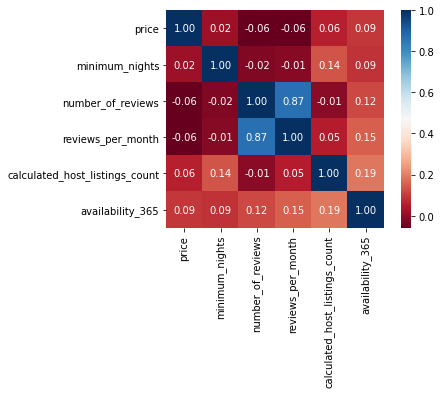

In [262]:
# Matriz de correlação com heatmap
sns.heatmap(corre, cmap='RdBu', fmt='.2f', square=True, linecolor='White',annot=True);

Quando analisamos os fatores de correlação conforme a matriz acima, podemos levantar as seguintes reflexões:

* Para as variáveis `price` x `number_of_reviews` temos uma correlação iversamente proporcional forte, pois a médidade que o preço aumenta menor é número de procura pelo imovél. 

* Para as variáveis `minimum_nights` x `number_of_reviews` tambem temos uma correlação iversamente proporcional forte, pois a médida que o minimo de noites é menor temos maior procura pelo imovél. 

* Para as variáveis `reviews_per_month` x `number_of_reviews` temos uma correlação proporcionalmente forte e positiva, partindo de uma analise mais explicita onde a medida que temos aumento no número de procura de um imovél, maior é número de procura total do mês. 



###**Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
Para que possamos compreender os tipos de imovéis mais procurados no airbnb, iremos quantificar todas as entradas da coluna `rom_type`

In [263]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_limp['room_type'].value_counts()

Private room       3924
Entire home/apt    3657
Shared room         138
Hotel room           73
Name: room_type, dtype: int64

In [264]:
#Instalando biblioteca
!pip install pywaffle -q

In [265]:
# mostrar a porcentagem de cada tipo de imóvel disponível
data = dict(df_limp['room_type'].value_counts()/df_limp['room_type'].value_counts().sum())

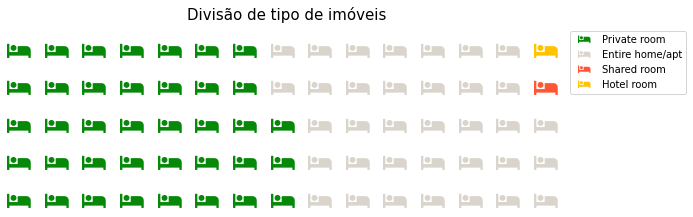


 Proporção (%) da distribuição de tipo de imóvel disponível: 



Private room       50.359343
Entire home/apt    46.932752
Shared room         1.771047
Hotel room          0.936858
Name: room_type, dtype: float64

In [266]:
from pywaffle import Waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#068808","#D9D5CC","#FF5733","#FFC300"),
                values=data, icons='bed', icon_size= 19,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                 icon_legend=True,figsize=(10,8)
                )
plt.title("Divisão de tipo de imóveis",fontsize=15)
fig.set_tight_layout(False)
plt.show()

print("\n","Proporção (%) da distribuição de tipo de imóvel disponível: \n")
display(df_limp['room_type'].value_counts()/df_limp['room_type'].value_counts().sum()*100) 

Conforme analise acima os tipos de imóveis que possuem maior concentração são **(Private room e Entire home/apt)** representando apenas entre os dois o total de **_*96%*_** dos tipos de imóveis disponivel.

### **Q7. Qual a localidade mais cara do dataset?**
A divisão de localidade dos imovéis airbnb na coluna `neighbourhood` para cidade de Dublin está segregado em *_**"Condados"**_*. Onde ressaltamos abaixo o custo médio de estadia:

In [267]:
# Proporção da quantidade de imóveis por condados registrados no dataset 
df_limp['neighbourhood'].value_counts()

Dublin City              5913
Dn Laoghaire-Rathdown     816
Fingal                    744
South Dublin              319
Name: neighbourhood, dtype: int64

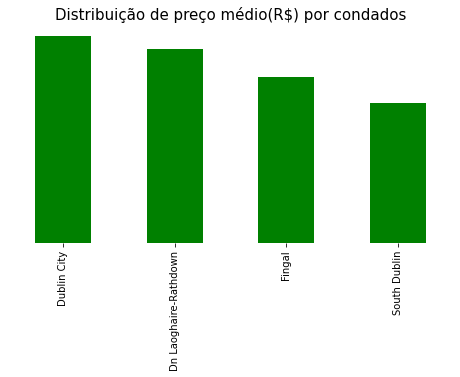



neighbourhood
Dublin City              749.460355
Dn Laoghaire-Rathdown    702.376324
Fingal                   600.822258
South Dublin             503.939812
Name: price, dtype: float64


In [268]:
# ver preços por bairros, na média

fig, ax= plt.subplots(figsize=(8,4))

df_limp.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).plot.bar(color='g')

# remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Titulo
ax.set_title('Distribuição de preço médio(R$) por condados',fontsize=15)

#remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel("")

plt.show()

print("\n")
print(df_limp.groupby('neighbourhood')['price'].mean().sort_values(ascending = False))

A analise gráfica nos mostra uma média de custo (R$) mais alta para imovéis,que estão localizados na região **Dublin City** semelhante a outros paises quanto mais próximo do centro da capital, o preço tende a ser maior. E a região de menor custo médio é **South Dublin** onde podemos econtrar valores  de estádia mais acessível.

###Aplicando filtro nas regiões de **maior e menor custo médio** de estádia diaria, para realizar uma analise de distribuição geografica.

In [269]:
#Travando a coluna `neighbourhood`como index
df_limp.set_index('neighbourhood',inplace=True)

In [270]:
#Filtro para os condados com maior preço x menor preço
df_map = df_limp.loc[['Dublin City','South Dublin']]

In [271]:
#importando map condicionado em escala para lat. e long.
ruh_m = plt.imread('/content/map (1).jpg')

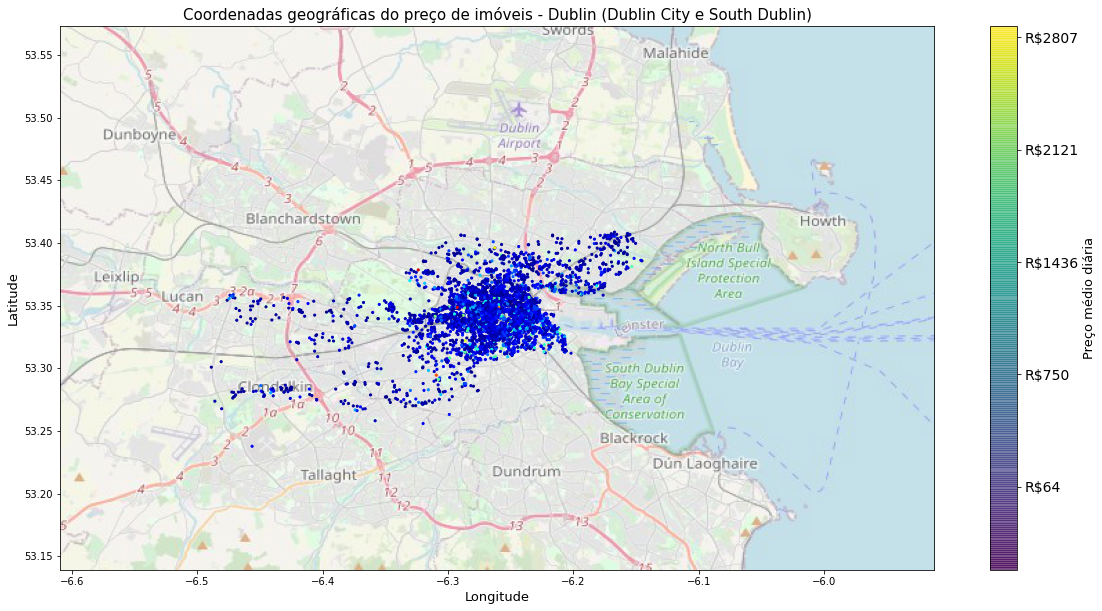

In [272]:
# plotar os imóveis pela latitude-longitude
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('/content/map (1).jpg')
fig, ax = plt.subplots(figsize = (20,10))

ax = df_map.plot(kind="scatter", x= 'longitude', y= 'latitude', ax=ax,
                       s=4.5,c='price', cmap=plt.get_cmap("jet"),alpha=5.3,
                       colorbar=False
                      )

ax.set_title('Coordenadas geográficas do preço de imóveis - Dublin (Dublin City e South Dublin)',fontsize= 15)
plt.imshow(california_img, extent=[-6.6096,-5.9120,53.1393,53.5729],alpha=0.7)
plt.ylabel("Latitude", fontsize=13)
plt.xlabel("Longitude", fontsize=13)

prices = df_limp['price']
tick_values = np.linspace(prices.min(), prices.max(),11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["R$%d"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Preço médio diária', fontsize=13)


plt.show()

Na distribuição geográfica podemos observar, que à medida que os pontos se aproximam da região central **Dublin City** conforme o heatmap temos uma mistura de cores, desde tonalidades mais claras para o mais escuro. E conforme a escala de preço médio, a mediada que temos uma tonalidade dos pontos mais claro (maior é o custo) e para a região **South Dublin** temos um padrão mais voltado a tonalidades escuras, o que refleti o seu baixo custo médio de estadia.



### **Q7.Qual a média do mínimo de noites para aluguel (minimum_nights) entre Dublin City e South Dublin?**


In [274]:
print("Dublin City -> ",df_map.loc[['Dublin City'],['minimum_nights']].mean())
print("South Dublin -> ",df_map.loc[['South Dublin'],['minimum_nights']].mean())

Dublin City ->  minimum_nights    3.636902
dtype: float64
South Dublin ->  minimum_nights    2.959248
dtype: float64


## Conclusões
* A ideia central do estudo, é realizar uma analise de custo beneficio de hospedagem no **airbnb na Irlanda (Dublin)** de forma que possamos se aproximar ao máximo do custo médio real em reais, para que posssamos obter uma base para tomada de decisão de qual lugar nas redondezas da capital, que possuem melhor custo beneficio para vaijar. 
E com base nesse estudo observamos que a região de **"South Dublin"** pode ser uma excelente opção no que tange a baixo custo, pois como observamos nas analises. O local possui mais opções de preço abaixo de mil reais de diaria com uma média de **_503 reais_** agora caso o seu orçamento esteja um pouco mais confortavel existem opções na região central no **Dublin City** com custo médio de **748 reais**.
E entre as opções de hospedagem, temos a maior opções para os tipos com **(Private room e Entire home/apt)** podendo optar por reservas de no minimo 3 noites.
* Essa é uma analise de dados simples, que pode ser replicada a diferentes tipos de negocio. Que demonstra que conhecer e estudar o seus dados, pode trazer respostas mais precisas, facilitando o tabalho de reconhecer oportunidades, e solucionar problemas. Tornando o planejamento e tomadada de decisão de uma atividade ou processo muito mais eficaz.
